# Mi guia de trabajo:
    1. Ver estadísticas generales y distribuciones
        -> Para conocer el terreno
    2. Graficar relaciones clave (employee_turnover vs otras)
        -> Boxplots, barras, etc.
    3. Hacer la matriz de correlación (Pearson o Spearman)
        -> Para identificar relaciones fuertes
    4. Ir profundizando en lo que descubra ahí

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("df_filtrado_notnulls.csv")
df.head(3)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
0,no,unknown,6.0,3,1.0,male,3,5,3,unknown,7,no,13,full time,0,5,20,15,1972,yes,10.0,195370.0,3.0
1,no,unknown,1.0,4,3.0,male,2,5,3,unknown,0,unknown,14,unknown,1,5,33,9,1971,yes,34.0,199990.0,3.0
2,no,travel_rarely,4.0,2,3.0,male,3,5,4,married,1,no,11,unknown,0,3,22,15,1981,yes,22.0,192320.0,3.0


1. Ver estadísticas generales y distribuciones:

In [6]:
# Ver estadísticas generales

df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


In [9]:
# Ver información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   employee_turnover                 1614 non-null   object 
 1   business_travel_frequency         1614 non-null   object 
 2   distance_from_home_km             1614 non-null   float64
 3   education_level                   1614 non-null   int64  
 4   environmental_satisfaction_level  1614 non-null   float64
 5   gender                            1614 non-null   object 
 6   job_involvement_level             1614 non-null   int64  
 7   job_level                         1614 non-null   int64  
 8   job_satisfaction_level            1614 non-null   int64  
 9   marital_status                    1614 non-null   object 
 10  num_companies_worked              1614 non-null   int64  
 11  overtime_hours                    1614 non-null   object 
 12  percen

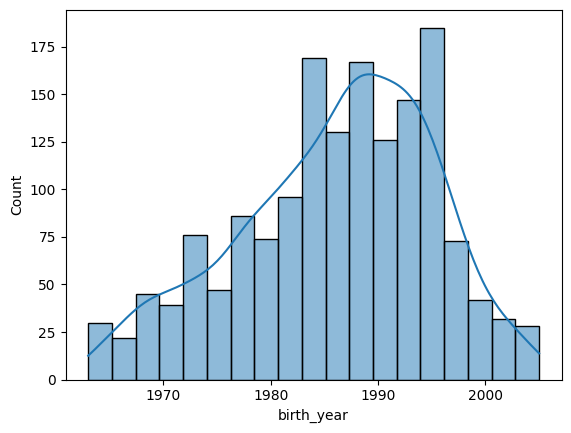

In [11]:
# Histplot de una columna numérica (por ejemplo, 'birth_year')

sns.histplot(df['birth_year'], kde=True);

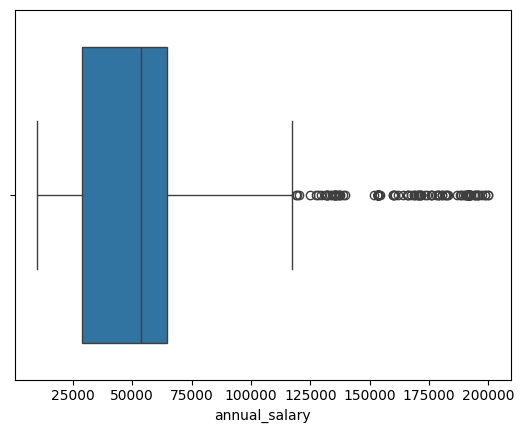

In [12]:
# Boxplot de una columna numérica (por ejemplo, 'annual_salary')

sns.boxplot(x=df['annual_salary']);


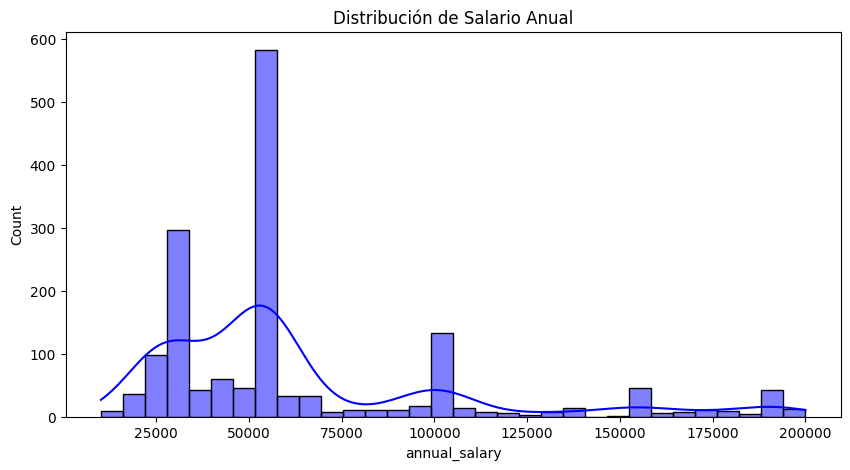

In [ ]:
# GRAFICO DE DISTRIBUCION:

# Histplot para 'annual_salary'

plt.figure(figsize=(10, 5)) # Establezco el tamaño de la figura del grafico, en este caso 10 unid. de ancho por 5 de alto
sns.histplot(df['annual_salary'], kde=True, color='blue')  #kde=Tru para agregar la curva de densidad(representacion de la densidad)
plt.title('Distribución de Salario Anual'); 

# El histograma nos muestra cómo se distribuyen los salarios anuales. La curva KDE ayuda a entender mejor la forma de la distribución,
#  ya que suaviza la información del histograma. Esto es útil para identificar si los datos están sesgados, distribuidos normalmente 
# o si hay picos que indican algo interesante (como valores más concentrados en un rango de salarios).

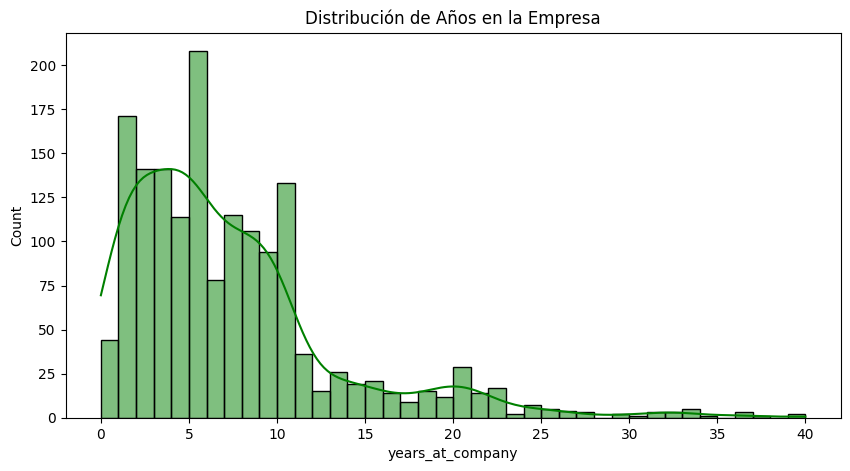

In [ ]:
# Histplot para 'years_at_company'

plt.figure(figsize=(10, 5))  # Establezco el tamaño de la figura del grafico, en este caso 10 unid. de ancho por 5 de alto
sns.histplot(df['years_at_company'], kde=True, color='green')  #kde=Tru para agregar la curva de densidad(representacion de la densidad)
plt.title('Distribución de Años en la Empresa');


# Lo que este gráfico enseña es la distribución de la antigüedad de los empleados en la empresa. 
# Si la distribución está sesgada hacia un valor más bajo o más alto, eso podría indicar algo interesante sobre la estabilidad laboral en la empresa.



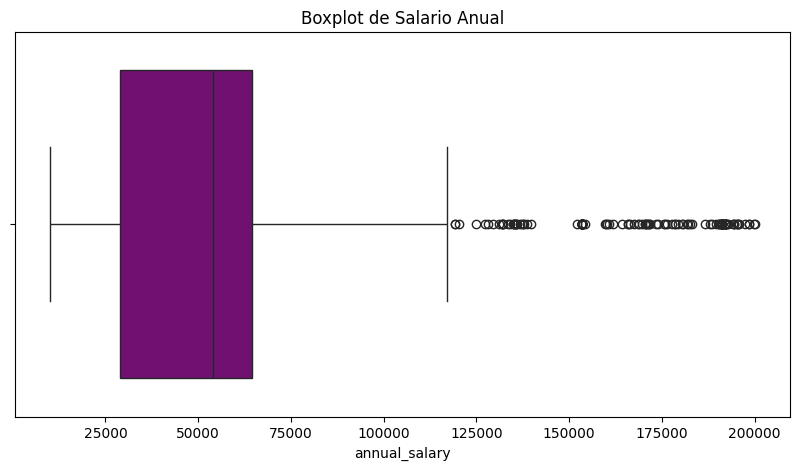

In [ ]:
# DIAGRAMA DE CAJA: util para ver la distribucion de los datos, la mediana, los cuartiles y los valores atipicos.
# Boxplot para 'annual_salary': 

plt.figure(figsize=(10, 5))  # Establezco el tamaño de la figura del grafico, en este caso 10 unid. de ancho por 5 de alto
sns.boxplot(x=df['annual_salary'], color='purple')
plt.title('Boxplot de Salario Anual');

# El boxplot es una representación visual que permite ver varios aspectos de la distribución de los salarios:
    # La caja (box) muestra el rango intercuartil (Q1 y Q3).
    # La línea dentro de la caja es la mediana.
    # Las líneas horizontales (bigotes) muestran el rango de los datos, hasta cierto límite (que se suele establecer por defecto en 1.5 veces el rango intercuartil).
    # Los puntos fuera de los bigotes son considerados outliers o valores atípicos, y representan salarios extremadamente altos o bajos.

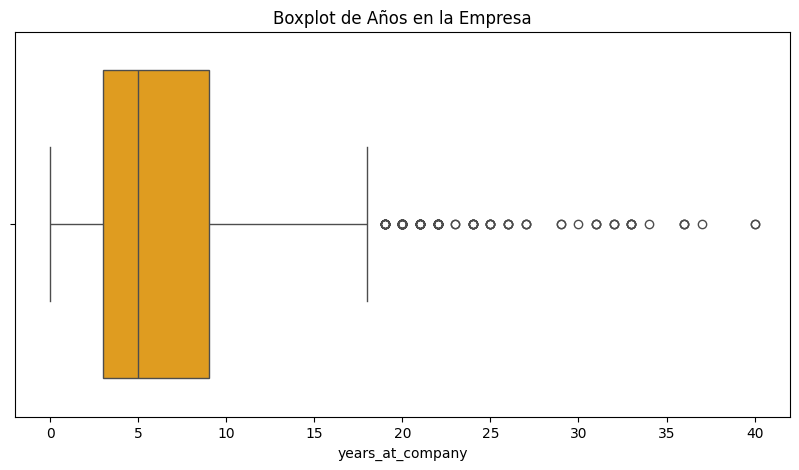

In [17]:
# Boxplot para 'years_at_company'

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['years_at_company'], color='orange')
plt.title('Boxplot de Años en la Empresa');


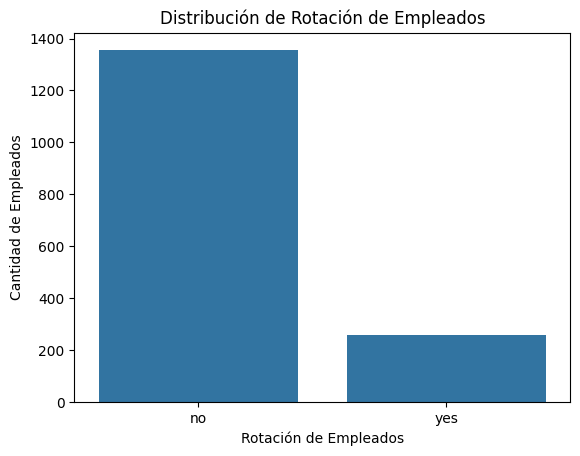

In [21]:
# Distribucion de rotacion ("employee_turnover"): voy a ver como se distribuye la rotacion de los empleados con un countplot para ver la 
# frecuencia de empleados que se han ido (yes) o los que se han quedado (no).DS_Store

sns.countplot(x='employee_turnover', data=df)  # Creo el gráfico de barras
plt.title('Distribución de Rotación de Empleados')  # Título del gráfico
plt.xlabel('Rotación de Empleados')  # Etiqueta en el eje X
plt.ylabel('Cantidad de Empleados');  # Etiqueta en el eje Y

# El gráfico de barras da una visualización clara de cuántos empleados se han ido (valor yes) y cuántos se han quedado (valor no).
#  Esto es útil para ver la proporción de rotación en tu empresa y entender si la rotación es un problema significativo

## Relación entre rotación y características demográficas:
- La rotación de empleados puede estar influenciada por variables como la edad, el género, el estado civil o la antigüedad en la empresa. 
- Podríamos hacer un análisis gráfico para ver si algunas de estas características están relacionadas con una mayor rotación.
Gráficos sugeridos:
Boxplot de employee_turnover vs. birth_year: Ver si hay una edad promedio de rotación.
Boxplot de employee_turnover vs. years_at_company: Ver si la antigüedad en la empresa está relacionada con la rotación.
Countplot de employee_turnover por gender o marital_status: Ver si la rotación es diferente según el género o el estado civil.

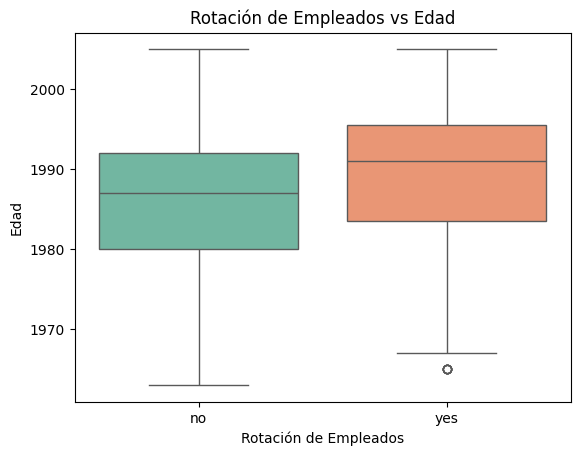

In [25]:
# Boxplot de 'employee_turnover' vs. 'birth_year'-> Ver si hay una edad promedio de rotación.

sns.boxplot(x='employee_turnover', y='birth_year', data=df, palette='Set2')  # palette= set" defino una paleta de colores suave y diferenciada por categorias.
plt.title('Rotación de Empleados vs Edad')
plt.xlabel('Rotación de Empleados')
plt.ylabel('Edad');


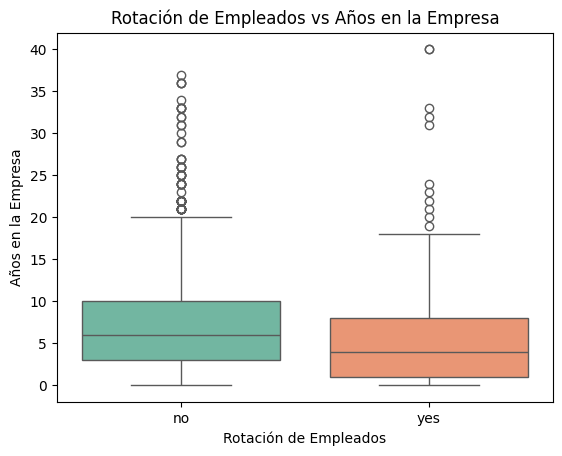

In [ ]:
# Boxplot de 'employee_turnover' vs 'years_at_company' -> para ver si los empleados que tienen mas antigüedad en la empresa tienen menos 
# probabilidad de irse.


sns.boxplot(x='employee_turnover', y='years_at_company', data=df, palette='Set2')
plt.title('Rotación de Empleados vs Años en la Empresa')
plt.xlabel('Rotación de Empleados')
plt.ylabel('Años en la Empresa');

# Aquí estoy comparando los años de antigüedad de los empleados con respecto a si se han ido o no.

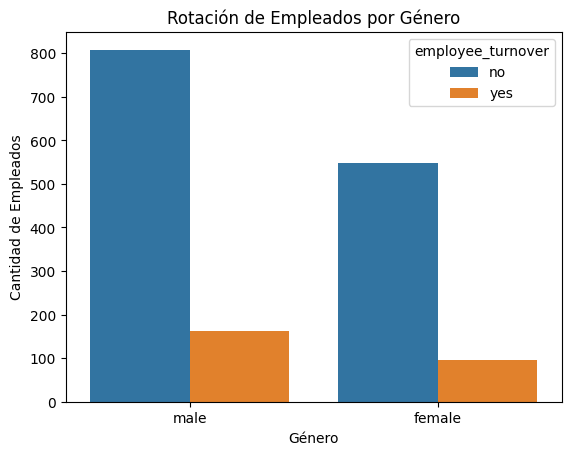

In [ ]:
# Countplot de 'employee_turnover' por 'gender' -> ete grafico veo si la rotacion de empleados varia entre generos.

sns.countplot(x='gender', hue='employee_turnover', data=df)  # hue='employee_turnover' muestra las barras divididas por rotación (quienes se fueron y quienes se quedaron).
plt.title('Rotación de Empleados por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Empleados');

# Esto me da una visualización comparativa de cuántos empleados de cada género se han ido y cuántos se han quedado

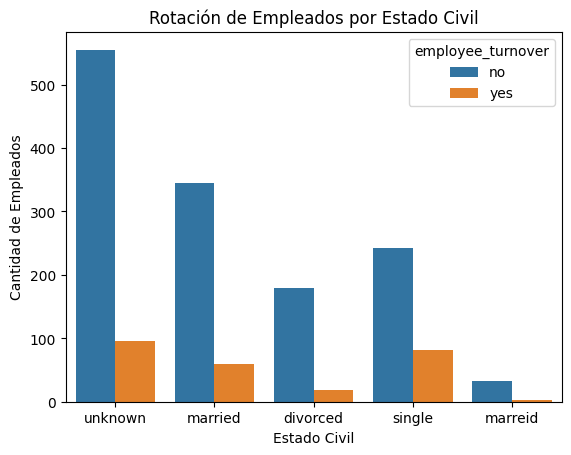

In [28]:
# Countplot de 'employee_turnover' por 'marital_status'

sns.countplot(x='marital_status', hue='employee_turnover', data=df) #  hue='employee_turnover'divide las barras para mostrar la cantidad de empleados que se fueron y los que se quedaron, según su estado civil.
plt.title('Rotación de Empleados por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Empleados');



# Relación entre rotación y satisfacción laboral: 
- Si hay variables relacionadas con la satisfacción laboral (por ejemplo, job_satisfaction_level), estas pueden estar directamente correlacionadas con la rotación de empleados. Los empleados con baja satisfacción laboral podrían ser más propensos a irse.

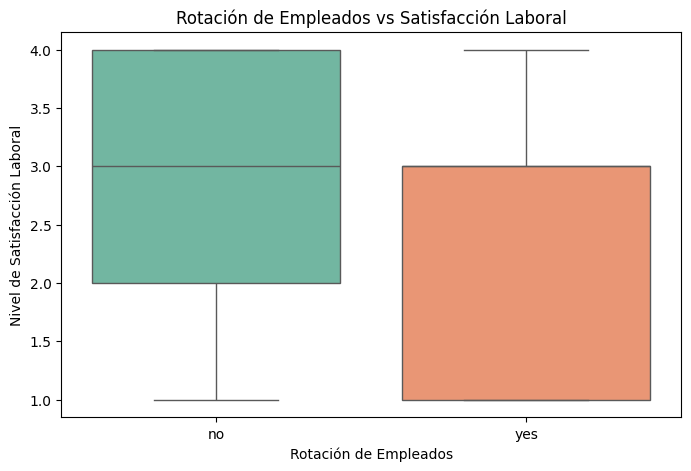

In [ ]:
# Boxplot para ver cómo se distribuyen los niveles de satisfacción laboral de los empleados que se han ido frente a los que se han quedado.

# Boxplot de 'employee_turnover' vs 'job_satisfaction_level'

sns.boxplot(x='employee_turnover', y='job_satisfaction_level', data=df, palette='Set2')
plt.title('Rotación de Empleados vs Satisfacción Laboral')
plt.xlabel('Rotación de Empleados')
plt.ylabel('Nivel de Satisfacción Laboral');

# El boxplot muestra la distribución de los niveles de satisfacción laboral entre los empleados que se han ido y los que se han quedado.
# Al observar el gráfico, puedo ver si existe una diferencia significativa en los niveles de satisfacción entre las dos categorías:

# Si la mediana de satisfacción laboral es más baja entre los empleados que se han ido, puede indicar que la insatisfacción laboral está relacionada con la rotación.
# También podrás observar los outliers o valores extremos, que podrían indicar empleados con niveles de satisfacción muy bajos o altos en comparación con el resto.

# Relación entre rotación y salario: 
- Los empleados pueden decidir irse si sienten que su salario no es adecuado o competitivo. Puedo ver si hay alguna relación entre la rotación y el salario.

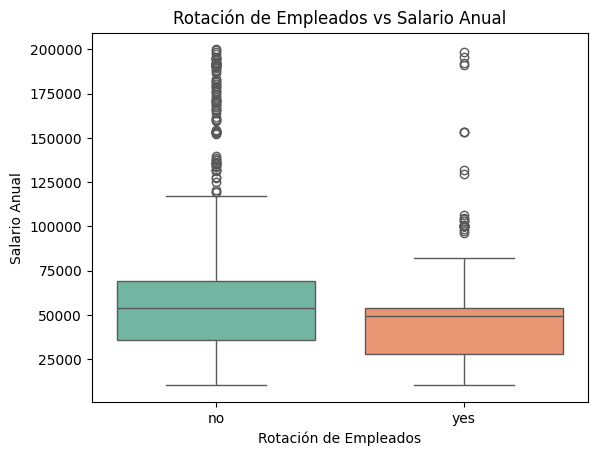

In [ ]:
# Boxplot de 'employee_turnover' vs. 'annual_salary'

sns.boxplot(x='employee_turnover', y='annual_salary', data=df, palette = "Set2")
plt.title('Rotación de Empleados vs Salario Anual')
plt.xlabel('Rotación de Empleados')
plt.ylabel('Salario Anual');

# El boxplot me permitirá comparar los salarios de los empleados que se han ido con los que se han quedado:

# Si los empleados que se han ido tienen salarios significativamente más bajos o más altos que los empleados que se han quedado, esto puede ser un indicio de que el salario influye en la decisión de abandonar la empresa.
# También puedo ver si hay outliers (valores extremos) en los salarios, que pueden indicar casos especiales.


# Relación entre rotación y trabajo remoto:
- Es posible que la rotación de empleados sea diferente entre los que trabajan de forma remota y los que trabajan en oficina. La flexibilidad laboral puede ser un factor importante.

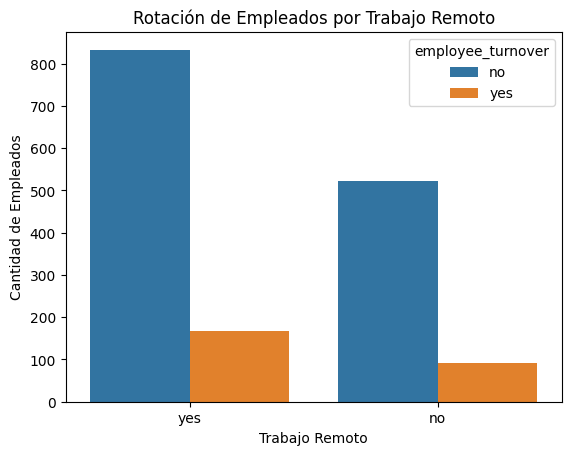

In [ ]:
# Countplot de 'employee_turnover' por 'remote_work'

sns.countplot(x='remote_work', hue='employee_turnover', data=df)
plt.title('Rotación de Empleados por Trabajo Remoto')
plt.xlabel('Trabajo Remoto')
plt.ylabel('Cantidad de Empleados');

# El countplot permitirá comparar la cantidad de empleados que se han ido y los que se han quedado en función de si trabajan de manera 
# remota o en la oficina:
    # -> Si hay más empleados que se van en la modalidad de trabajo remoto o trabajo en oficina, podríamos deducir que esta modalidad influye en la decisión de rotación.
    # -> Este gráfico me dará una idea de si el trabajo remoto tiene algún impacto significativo en la rotación de empleados.

# Correlaciones entre variables: 
- Finalmente,  hago una matriz de correlación para ver qué variables están más fuertemente correlacionadas con la rotación de empleados. Esto puede incluir tanto variables numéricas como categóricas.

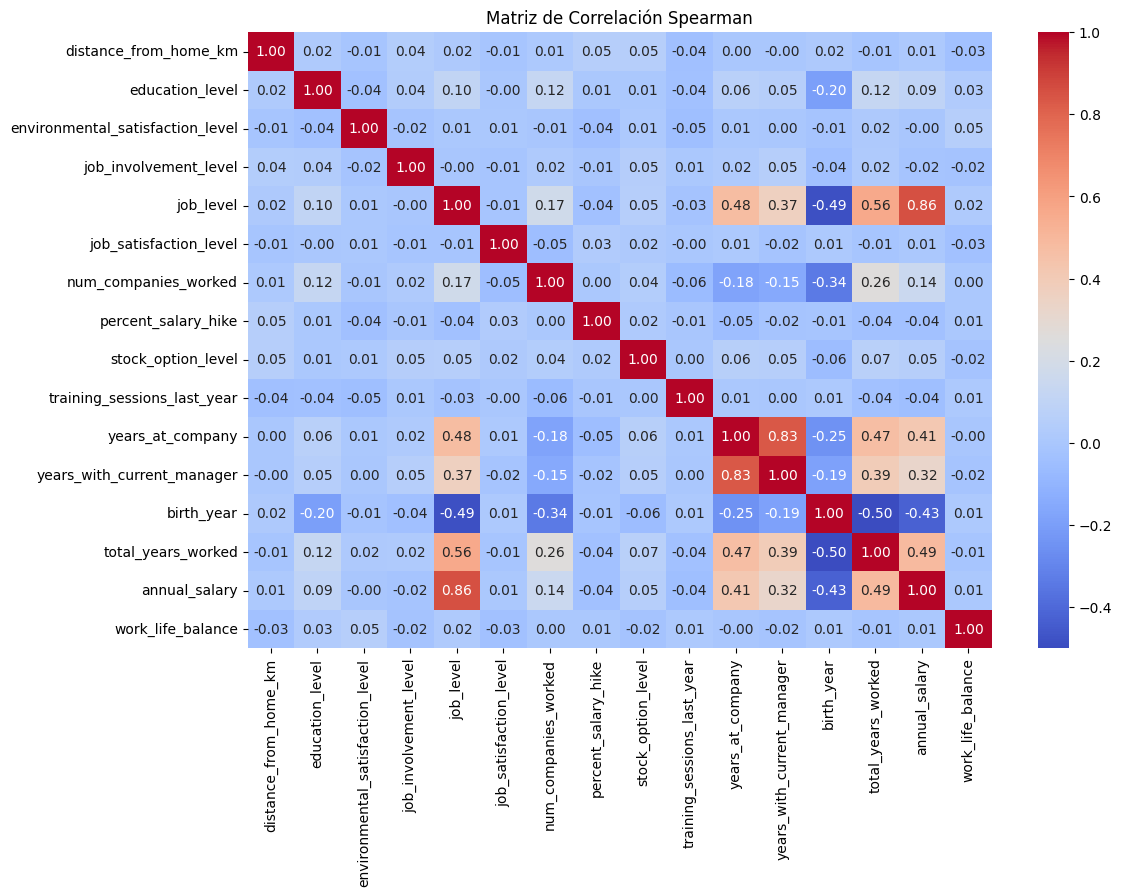

In [41]:
# Matriz de correlación Pearson
# Voy a calcular la correlación de Pearson (que es la correlación estándar para variables numéricas) entre todas las variables numéricas del dataset.

# Filtro solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=['number'])

# Calculo la correlación de Spearman entre las variables numéricas
spearman_corr = df_numeric.corr(method='spearman')  

# Graficar la matriz de correlación de Spearman con un heatmap
plt.figure(figsize=(12, 8)) # establezco el tamaño del grafico.
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación Spearman');



# spearman_corr = Es la tabla con los valores de correlación que calculamos en el paso anterior.
# annot=True: Muestra los valores de correlación dentro de cada celda del mapa de calor.
#  cmap='coolwarm': Especifica los colores para el mapa de calor, donde los colores fríos representan valores bajos y los colores cálidos valores altos.
# fmt='.2f': Muestra los valores con 2 decimales.

# Qué muestra el gráfico anterior?
El gráfico es un mapa de calor que muestra la relación entre todas las variables numéricas en el dataset. Los valores de la correlación de Spearman estan representados como números en cada celda:

Un valor cercano a 1 indica una relación muy fuerte entre dos variables (cuando una sube, la otra también lo hace).
Un valor cercano a -1 indica una relación inversa muy fuerte (cuando una sube, la otra baja).
Un valor cercano a 0 indica que no hay relación significativa entre las dos variables.

*** Interpretacion de los resultados de la matriz de correlación entre job level y otras variables. ***

1. Job Level y Annual Salary (correlación de 0.86)
Interpretación: 0.86 es una correlación positiva fuerte. Esto significa que a mayor nivel de trabajo (job level), mayor será el salario anual (annual salary). Esto es un resultado esperado, ya que en muchas organizaciones los empleados con niveles más altos de trabajo generalmente tienen salarios más altos.
2. Job Level y Total Years Worked (correlación de 0.56)
Interpretación: 0.56 es una correlación moderada positiva. Esto indica que, aunque no es una relación perfecta, hay una tendencia a que los empleados con un nivel de trabajo más alto hayan trabajado más tiempo en total. En otras palabras, los empleados que han pasado más años trabajando en general suelen tener niveles de trabajo más altos.
3. Job Level y Birth Year (correlación de -0.49)
Interpretación: -0.49 es una correlación negativa moderada. Esto sugiere que a medida que aumenta el nivel de trabajo, disminuye el año de nacimiento. Esto podría ser una indicación de que los empleados más jóvenes tienen niveles de trabajo más bajos, mientras que los empleados mayores tienen niveles de trabajo más altos. Esto puede ser debido a que los empleados más mayores tienen más experiencia y, por lo tanto, ocupan puestos de nivel más alto.
4. Job Level y Years with Current Manager (correlación de 0.37)
Interpretación: 0.37 es una correlación moderada positiva. Aunque no es una correlación muy fuerte, sugiere que los empleados con niveles de trabajo más altos tienden a haber trabajado más años con su actual gerente. Es probable que los empleados que permanecen más tiempo con el mismo gerente y tienen una buena relación de trabajo obtengan niveles más altos de responsabilidad.
5. Job Level y Years at Company (correlación de 0.48)
Interpretación: 0.48 es una correlación moderada positiva. Esto indica que los empleados con más años en la empresa tienden a tener un nivel de trabajo más alto. Con el tiempo, a medida que ganan experiencia dentro de la organización, los empleados pueden ser promovidos a niveles de trabajo más altos.



# GRAFICOS PARA VISUALIZAR LAS CORRELACIONES DE JOB LEVEL CON OTRAS COLUMNAS:

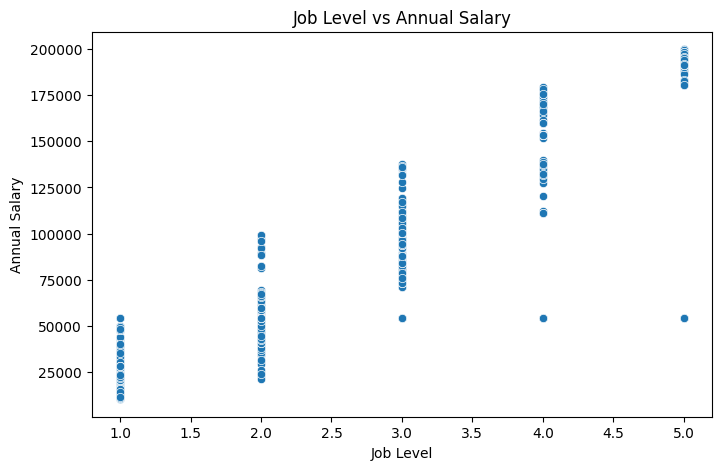

In [42]:
# Job Level y Annual Salary (correlación de 0.86)
#Este gráfico de dispersión mostrará claramente cómo el nivel de trabajo se relaciona con el salario anual.


plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='annual_salary', data=df)
plt.title('Job Level vs Annual Salary')
plt.xlabel('Job Level')
plt.ylabel('Annual Salary');


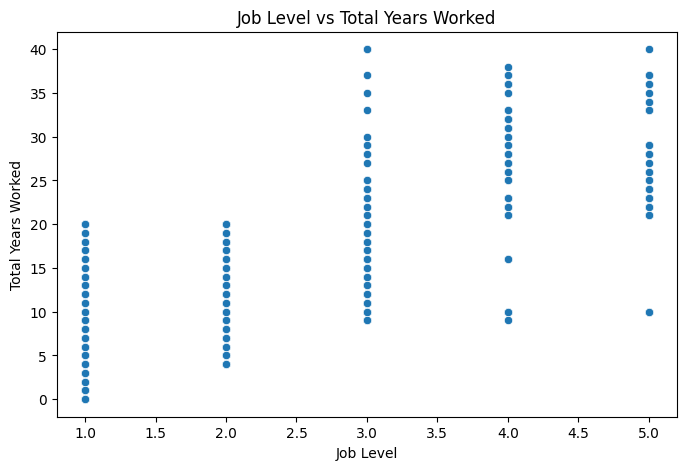

In [43]:
# Job Level y Total Years Worked (correlación de 0.56)
#Otro gráfico de dispersión para ver cómo el nivel de trabajo se asocia con los años trabajados en total.


plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='total_years_worked', data=df)
plt.title('Job Level vs Total Years Worked')
plt.xlabel('Job Level')
plt.ylabel('Total Years Worked');



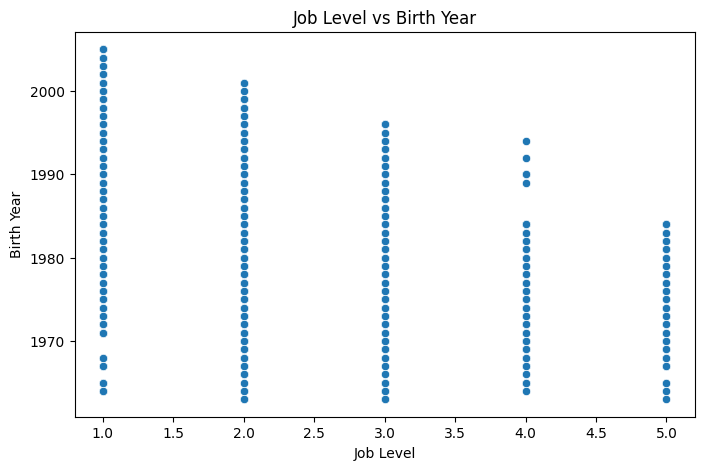

In [44]:
# Job Level y Birth Year (correlación de -0.49)
#En este caso, la correlación es negativa, por lo que espero que el gráfico muestre una tendencia descendente.

plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='birth_year', data=df)
plt.title('Job Level vs Birth Year')
plt.xlabel('Job Level')
plt.ylabel('Birth Year');



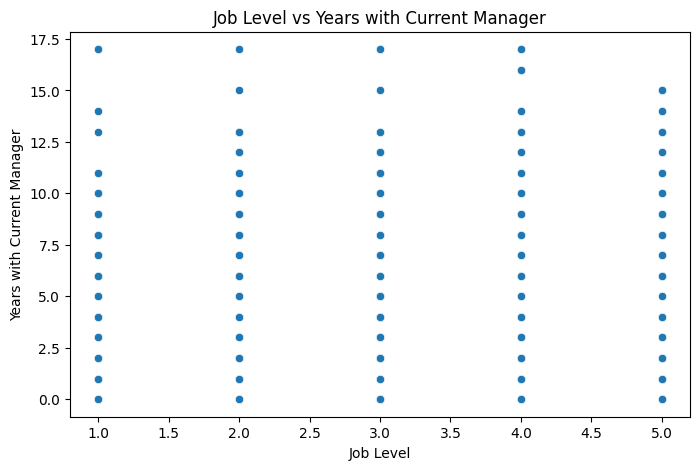

In [45]:
#  Job Level y Years with Current Manager (correlación de 0.37)
# Este gráfico ayuda a ver si hay una relación moderada entre los años con el gerente actual y el nivel de trabajo

plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='years_with_current_manager', data=df)
plt.title('Job Level vs Years with Current Manager')
plt.xlabel('Job Level')
plt.ylabel('Years with Current Manager');


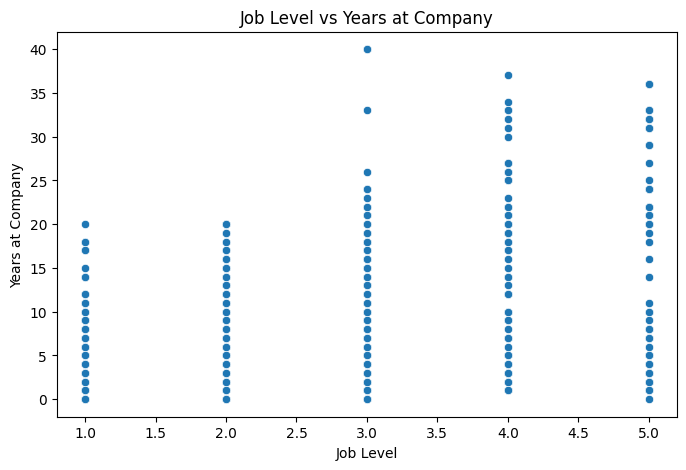

In [46]:
# Job Level y Years at Company (correlación de 0.48)
# Otro gráfico de dispersión para  ver si los empleados con más antigüedad en la empresa tienen un nivel de trabajo más alto.

plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='years_at_company', data=df)
plt.title('Job Level vs Years at Company')
plt.xlabel('Job Level')
plt.ylabel('Years at Company');



*** Explicación de los gráficos: ***
- Scatterplot (diagrama de dispersión): Cada punto representa una combinación de las dos variables (por ejemplo, un punto en el gráfico entre job_level y annual_salary). Estos gráficos permiten observar la tendencia general entre las dos variables.
- En los gráficos de dispersión con correlación positiva, los puntos deberían mostrar una tendencia ascendente (a medida que aumenta una variable, la otra también aumenta).
- En los gráficos con correlación negativa, los puntos deberían mostrar una tendencia descendente (cuando una variable aumenta, la otra disminuye).

*** Interpretacion de los resultados de la matriz de correlación entre years_at_company y otras variables. ***

1. Years_at_company vs annual_salary: La correlación de 0.41 es una correlación positiva moderada. Esto sugiere que, en promedio, los empleados que tienen más tiempo en la empresa tienden a tener salarios más altos, aunque no de manera muy fuerte.
2. Years at Company y Total Years Worked (correlación de 0.47): La correlación de 0.47 es una correlación moderada positiva, lo que sugiere que los empleados con más años en la empresa tienden a haber trabajado más años en total en su carrera profesional.
3. Years at Company y Birth Year (correlación de -0.25): La correlación de -0.25 es una correlación negativa débil. Esto indica que, en general, los empleados más jóvenes tienden a tener menos tiempo en la empresa. Sin embargo, la relación no es muy fuerte, por lo que es solo una tendencia débil.
4. Years at Company y Years with Current Manager (correlación de 0.83): La correlación de 0.83 es una correlación muy fuerte positiva, lo que significa que los empleados que han pasado más tiempo en la empresa tienden a haber trabajado más tiempo con su gerente actual. Esto puede indicar que los empleados con más antigüedad en la empresa tienen una relación más larga con su gerente, lo cual podría reflejar una mayor estabilidad o continuidad en su puesto.




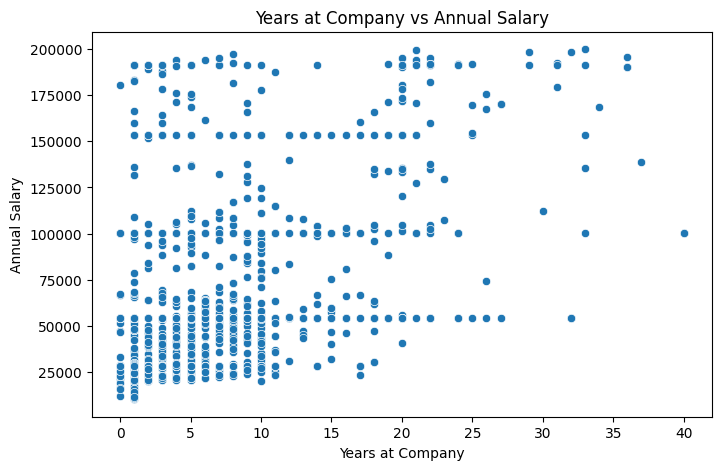

In [47]:
# Gráfico de dispersión entre Years at Company y Annual Salary

plt.figure(figsize=(8, 5))
sns.scatterplot(x='years_at_company', y='annual_salary', data=df)
plt.title('Years at Company vs Annual Salary')
plt.xlabel('Years at Company')
plt.ylabel('Annual Salary');



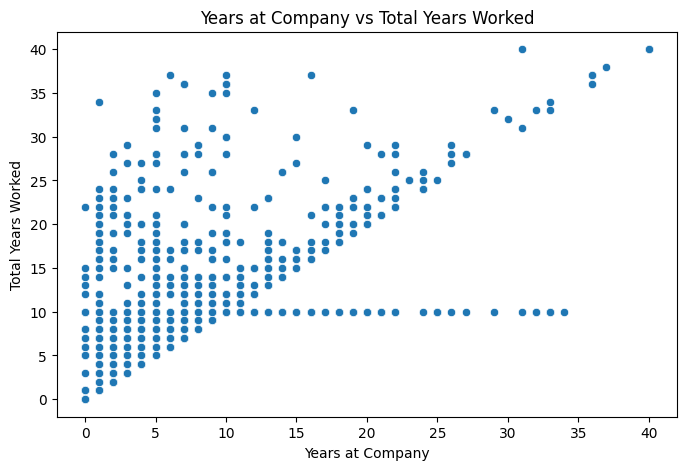

In [48]:
# Gráfico de dispersión entre Years at Company y Total Years Worked

plt.figure(figsize=(8, 5))
sns.scatterplot(x='years_at_company', y='total_years_worked', data=df)
plt.title('Years at Company vs Total Years Worked')
plt.xlabel('Years at Company')
plt.ylabel('Total Years Worked');



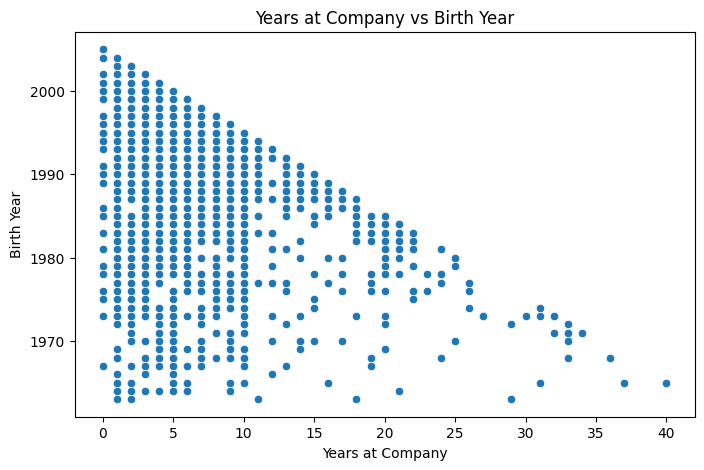

In [49]:
# Gráfico de dispersión entre Years at Company y Birth Year

plt.figure(figsize=(8, 5))
sns.scatterplot(x='years_at_company', y='birth_year', data=df)
plt.title('Years at Company vs Birth Year')
plt.xlabel('Years at Company')
plt.ylabel('Birth Year');



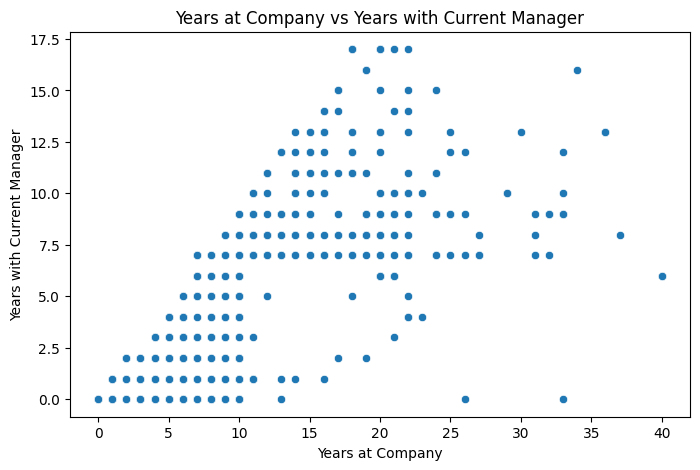

In [51]:
# Gráfico de dispersión entre Years at Company y Years with Current Manager

plt.figure(figsize=(8, 5))
sns.scatterplot(x='years_at_company', y='years_with_current_manager', data=df)
plt.title('Years at Company vs Years with Current Manager')
plt.xlabel('Years at Company')
plt.ylabel('Years with Current Manager');

